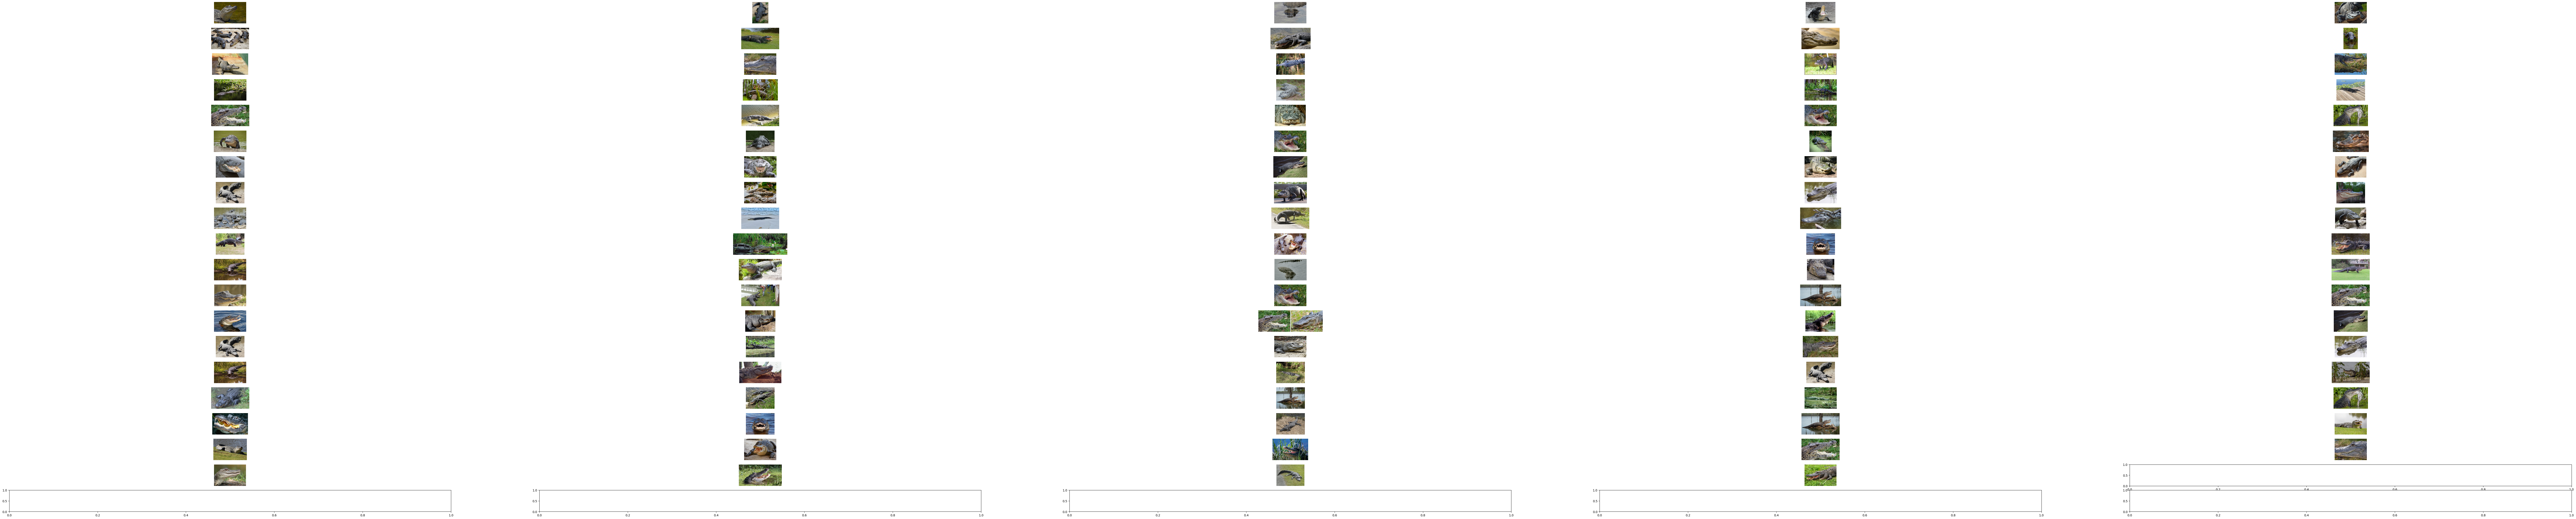

In [2]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the downloaded dataset
dataset_path = 'alligators'

# Get the list of image files in the dataset directory
image_files = [file for file in os.listdir(dataset_path) if file.endswith('.jpg')]

# Plot the first 5 images
fig, axes = plt.subplots(20, 5, figsize=(150, 30))

for i, image_file in enumerate(image_files[:100]):  # limiting to first 100 images
    image_path = os.path.join(dataset_path, image_file)
    image = Image.open(image_path)
    axes[i//5, i%5].imshow(image)  # corrected here
    axes[i//5, i%5].axis('off')

plt.show()

In [4]:
from PIL import Image
import os

def convert_to_jpg(input_dir, output_dir):
    # Ensure the output directory exists, create it if not
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Walk through the input directory
    for root, dirs, files in os.walk(input_dir):
        for file in files:
            # Check if the file is an image
            if file.endswith(('.png', '.jpeg', '.gif', '.bmp','.JPG')):
                # Open the image file
                img_path = os.path.join(root, file)
                img = Image.open(img_path)
                
                # Convert and save as JPG
                output_path = os.path.join(output_dir, os.path.splitext(file)[0] + '.jpg')
                img.convert('RGB').save(output_path)
                print(f"Converted {file} to JPG")

# Example usage:
input_directory = 'alligators'
output_directory = 'alligators'

convert_to_jpg(input_directory, output_directory)

Converted Image_16.png to JPG
Converted Image_21.png to JPG
Converted Image_31.jpeg to JPG
Converted Image_5.jpeg to JPG
Converted Image_89.png to JPG


In [5]:
import os
import shutil
import random

# Define the source paths
alligator_path = 'alligators'
panda_path = 'panda'

# Define the destination paths
train_alligator_path = 'dataset/train/alligators'
train_panda_path = 'dataset/train/panda'
test_alligator_path = 'dataset/test/alligators'
test_panda_path = 'dataset/test/panda'

# Create the destination directories
os.makedirs(train_alligator_path, exist_ok=True)
os.makedirs(train_panda_path, exist_ok=True)
os.makedirs(test_alligator_path, exist_ok=True)
os.makedirs(test_panda_path, exist_ok=True)

# Function to split files
def split_files(src_path, train_dest_path, test_dest_path, train_ratio=0.8):
    # Get the list of all image files
    files = [file for file in os.listdir(src_path) if file.lower().endswith('.jpg' or '.jpeg' or '.png' or '.bmp')]

    # Shuffle the list
    random.shuffle(files)

    # Calculate the index that separates training and testing files
    train_test_split_idx = int(len(files) * train_ratio)

    # Move the files
    for i, file in enumerate(files):
        if i < train_test_split_idx:
            shutil.copy(os.path.join(src_path, file), os.path.join(train_dest_path, file))
        else:
            shutil.copy(os.path.join(src_path, file), os.path.join(test_dest_path, file))

# Split alligator and panda files
split_files(alligator_path, train_alligator_path, test_alligator_path)
split_files(panda_path, train_panda_path, test_panda_path)

In [6]:
from PIL import Image
import os

def resize_images_in_folder(input_folder, output_folder, target_size=(200, 200)):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        # Open image
        with Image.open(os.path.join(input_folder, filename)) as img:
            # Resize image
            img_resized = img.resize(target_size)

            # Save resized image
            img_resized.save(os.path.join(output_folder, filename))

# Example usage
input_folder = "dataset/test/alligators"
output_folder = "dataset/test/alligators"
resize_images_in_folder(input_folder, output_folder)


In [8]:
input_folder = "dataset/test/panda"
output_folder = "dataset/test/panda"
resize_images_in_folder(input_folder, output_folder)

## VGG One block

c:\Users\singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Test accuracy : 77.500


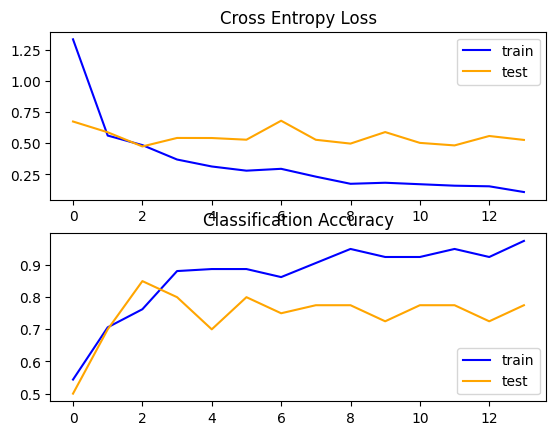

In [71]:

# baseline model for the dogs vs cats dataset
import sys
import tensorflow as tf
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import time

 
# define cnn model
def VGG1():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(learning_rate=0.001, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
 # plot loss
 pyplot.subplot(211)
 pyplot.title('Cross Entropy Loss')
 pyplot.plot(history.history['loss'][::2], color='blue', label='train')
 pyplot.plot(history.history['val_loss'][::2], color='orange', label='test')
 pyplot.legend()
 # plot accuracy
 pyplot.subplot(212)
 pyplot.title('Classification Accuracy')
 pyplot.plot(history.history['accuracy'][::2], color='blue', label='train')
 pyplot.plot(history.history['val_accuracy'][::2], color='orange', label='test')
 pyplot.legend()
 # save plot to file
 pyplot.show()
 
# run the test harness for evaluating a model
def run_test_harness(mod):
 # define model
 model = mod()
 # create data generator
 datagen = ImageDataGenerator(rescale=1.0/255.0)
 # prepare iterators
 train_it = datagen.flow_from_directory('dataset/train/',
 class_mode='binary', batch_size=20, target_size=(200, 200))
 test_it = datagen.flow_from_directory('dataset/test/',
 class_mode='binary', batch_size=20, target_size=(200, 200))
 # fit model
 start_time = time.time()
 history = model.fit(train_it, steps_per_epoch=len(train_it),
 validation_data=test_it, validation_steps=len(test_it), epochs=28, verbose=0)
 end_time = time.time()
 # evaluate model
 _, acc1 = model.evaluate(test_it, steps=len(test_it), verbose=0)
 _, acc2 = model.evaluate(train_it, steps=len(train_it), verbose=0)
 print('Test accuracy : %.3f' % (acc1 * 100.0))
 # learning curves
 summarize_diagnostics(history)
 return acc1,acc2,history.history['loss'][-2],end_time-start_time,model.count_params()
 
# entry point, run the test harness
VGG1_data=run_test_harness(VGG1)

## VGG 3 Block model

In [72]:

# define cnn model
def VGG3():
 model = Sequential()
 model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
 model.add(MaxPooling2D((2, 2)))
 model.add(Flatten())
 model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
 model.add(Dense(1, activation='sigmoid'))
 # compile model
 opt = SGD(learning_rate=0.002, momentum=0.9)
 model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
 return model

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Test accuracy : 85.000


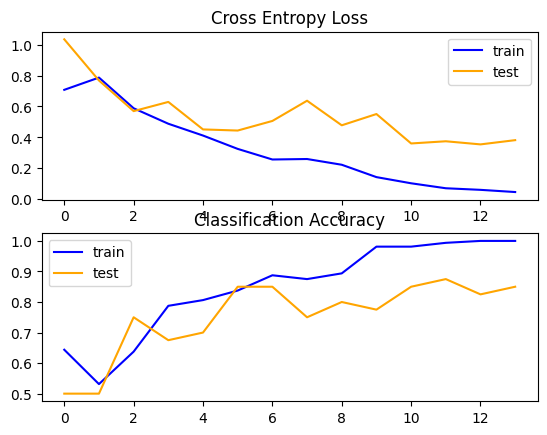

In [73]:
# for 3 block vgg model
VGG3_data=run_test_harness(VGG3)

## VGG 3 with data augmentation

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Test accuracy : 85.000


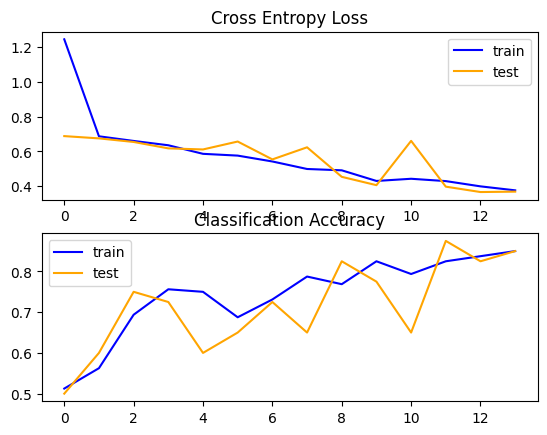

In [74]:

from keras.utils import to_categorical

 
# run the test harness for evaluating a model
def VGG3_withaug():
 # define model
 model = VGG3()
 # create data generators
 train_datagen = ImageDataGenerator(rescale=1.0/255.0,
 width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
 test_datagen = ImageDataGenerator(rescale=1.0/255.0)
 # prepare iterators
 train_it = train_datagen.flow_from_directory('dataset/train/',
 class_mode='binary', batch_size=20, target_size=(200, 200))
 test_it = test_datagen.flow_from_directory('dataset/test/',
 class_mode='binary', batch_size=20, target_size=(200, 200))
 # fit model
 start_time = time.time()
 history = model.fit(train_it, steps_per_epoch=len(train_it),
 validation_data=test_it, validation_steps=len(test_it), epochs=28, verbose=0)
 end_time = time.time()
 # evaluate model
 _, acc1 = model.evaluate(test_it, steps=len(test_it), verbose=0)
 _, acc2 = model.evaluate(train_it, steps=len(train_it), verbose=0)
 
 print('Test accuracy : %.3f' % (acc1 * 100.0))
 # learning curves
 summarize_diagnostics(history)
 return acc1,acc2,history.history['loss'][-2],end_time-start_time,model.count_params()
 
 
# entry point, run the test harness
VGG3aug_data=VGG3_withaug()

## VGG16 with tuning only final MLP layers

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Test accuracy : 97.500


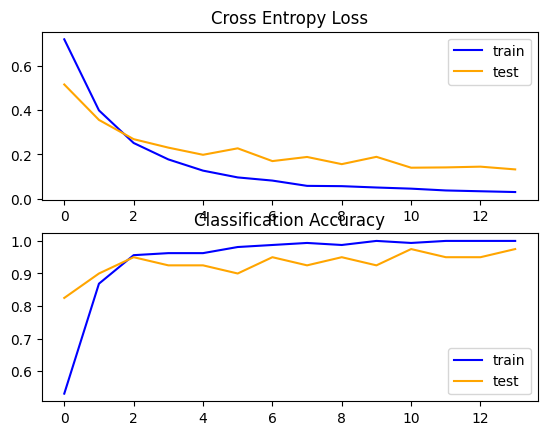

In [75]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

def VGGfine():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

    # Add custom layers on top of VGG16
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)  # num_classes is the number of output classes

    # Create the model
    model = Model(inputs=base_model.input, outputs=output)

    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), 
                loss='binary_crossentropy', 
                metrics=['accuracy'])
    return model

VGG16fin_data = run_test_harness(VGGfine)

## VGG16 with tuning all layers

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Test accuracy : 95.000


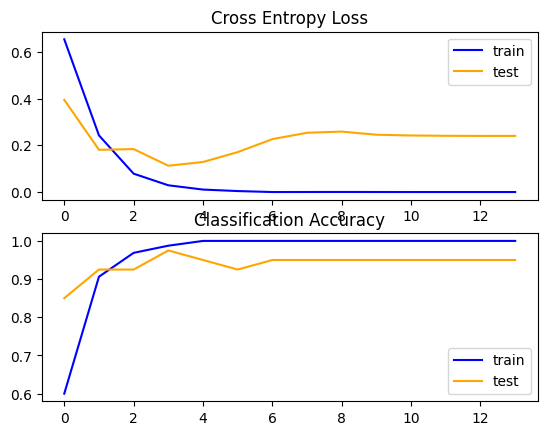

In [76]:
def VGG_16():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(200, 200, 3))

    # Add custom layers on top of VGG16
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    output = Dense(1, activation='sigmoid')(x)  # num_classes is the number of output classes

    # Create the model
    model = Model(inputs=base_model.input, outputs=output)

    for layer in base_model.layers:
        layer.trainable = True

    # Compile the model
    model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), 
                loss='binary_crossentropy', 
                metrics=['accuracy'])
    return model

VGG16_data=run_test_harness(VGG_16)

In [85]:
from tabulate import tabulate
headers = ["Class","Test Acc","Train Acc","Train Loss","Train Time","No of parameters"]
data=list(zip(list(("VGG1",)+VGG1_data),list(("VGG3",)+VGG3_data),list(("VGG3 ith aug",)+VGG3aug_data),list(("VGG16",)+VGG16_data),list(("VGG16 with finetune",)+VGG16fin_data)))
transposed_data = list(zip(*data))
print(tabulate(transposed_data, headers=headers))



Class                  Test Acc    Train Acc    Train Loss    Train Time    No of parameters
-------------------  ----------  -----------  ------------  ------------  ------------------
VGG1                      0.775      0.99375   0.107943          79.2563            40961153
VGG3                      0.85       1         0.0459962         66.2353            10333505
VGG3 ith aug              0.85       0.8625    0.376249         101.775             10333505
VGG16                     0.95       1         3.46341e-05      922.066             19433793
VGG16 with finetune       0.975      1         0.0306465        203.464             19433793


## Results

1. The results are mostly as expected. Since the the task at hand is very simple for models like VGG, most of them perform good and as expected the peformance increases as we move from VGG of 1 block to 3 and later VGG16 with fine tuning, with VGG16 with completely trainable modele being the only exception.
2. 